In [83]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [476]:
df_all = pd.read_csv("perfume.csv")

In [477]:
pd.set_option('display.max_columns', None)

In [478]:
df_all.head()

,brand,title,date,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,clslove_female25under,clslove_male25under,clslove_female25older,clslove_male25older,clslike_female25under,clslike_male25under,clslike_female25older,clslike_male25older,clsdislike_female25under,clsdislike_male25under,clsdislike_female25older,clsdislike_male25older,clswinter_female25under,clswinter_male25under,clswinter_female25older,clswinter_male25older,clsspring_female25under,clsspring_male25under,clsspring_female25older,clsspring_male25older,clssummer_female25under,clssummer_male25under,clssummer_female25older,clssummer_male25older,clsautumn_female25under,clsautumn_male25under,clsautumn_female25older,clsautumn_male25older,clsday_female25under,clsday_male25under,clsday_female25older,clsday_male25older,clsnight_female25under,clsnight_male25under,clsnight_female25older,clsnight_male25older,Ihaveit,Ihadit,Iwantit,notes_1,notes_2,notes_3,notes_4,notes_5,notes_6,notes_7,notes_8,notes_9,notes_10,notes_11,notes_12,notes_13,notes_14,notes_15,notes_16,notes_17,notes_18,notes_19,notes_20,gender
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,"woody,earthy,animalic,amber,musky,balsamic",5.0,3,0,0,0,0,3,0,1,0,3,100,1,1,50,50,50,50,0,0,50,50,1,1,1,100,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,3.0,0.0,0.0,Top1Bulgarian Rose,Top2Bergamot,Top3Fruits,Top4Agarwood (Oud),Middle0Sandalwood,Middle1Agarwood (Oud),Middle2Cypriol Oil or Nagarmotha,Middle3Benzoin,Base0Amber,Base1Castoreum,Base2Civet,Base3Moss,Base4Agarwood (Oud),Base5Indian Oud,NaN,NaN,NaN,NaN,NaN,NaN,women
1,Ajmal,Aatifa Ajmal for women and men,2014,"fresh spicy,woody,musky,rose,amber",4.2,10,1,0,0,0,5,0,0,3,3,100,80,20,100,60,60,60,0,0,80,80,1,1,60,40,1,1,80,1,1,1,20,1,1,1,80,20,1,1,40,20,1,1,60,1,1,1,60,1,1,1,60,20,1,1,60,20,8.0,0.0,0.0,Top1Rose,Top2Cumin,Middle0Amber,Middle1Woody Notes,Base0Musk,Base1Amber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,"rose,woody,musky,oud,fruity",0.0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,3.0,Top1Rose,Top2Sandalwood,Top3Apple,Top4Agarwood (Oud),Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for w...,2010,"white floral,green,ozonic,fresh,animalic",0.0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,100,100,100,0,0,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,0.0,0.0,1.0,Top1Green Tea,Top2White Flowers,Top3Ozonic notes,Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,"woody,warm spicy,amber,balsamic,musky",0.0,2,0,0,0,0,2,0,2,0,0,1,1,1,100,100,100,100,0,0,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,0.0,0.0,2.0,Top1Amber,Top2Sandalwood,Top3Floral Notes,Top4Vetiver,Top5Saffron,Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women


In [479]:
#len(df_all.columns)

In [480]:
#df_all['rating_score'].unique() #len(df_all['rating_score'].unique()) -> 318

In [481]:
df_all['rating_score'].value_counts()

0.00    9307
4.00    4820
5.00    2819
4.50    1696
3.00    1047
        ... 
1.93       1
1.33       1
1.95       1
2.04       1
2.24       1
Name: rating_score, Length: 318, dtype: int64

(array([9.307e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.840e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        7.000e+00, 2.000e+00, 1.700e+01, 7.000e+00, 2.000e+00, 2.900e+01,
        1.000e+01, 8.000e+00, 7.000e+00, 2.000e+00, 1.580e+02, 0.000e+00,
        1.800e+01, 2.500e+01, 3.100e+01, 3.400e+01, 1.140e+02, 6.100e+01,
        3.000e+01, 1.200e+01, 5.240e+02, 4.100e+01, 6.700e+01, 7.500e+01,
        7.900e+01, 2.250e+02, 8.500e+01, 1.540e+02, 1.010e+02, 6.900e+01,
        1.117e+03, 1.460e+02, 3.060e+02, 2.380e+02, 3.410e+02, 5.600e+02,
        7.130e+02, 6.320e+02, 4.400e+02, 5.120e+02, 1.158e+03, 6.130e+02,
        1.189e+03, 1.149e+03, 1.106e+03, 1.713e+03, 1.062e+03, 1.713e+03,
        1.036e+03, 9.600e+02, 5.524e+0

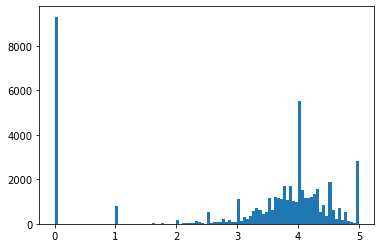

In [482]:
plt.hist(df_all['rating_score'], 100)

In [483]:
df_no_zeros = df_all[df_all['rating_score'] != 0.0]

In [484]:
df_no_zeros.shape

(41905, 86)

In [485]:
df_no_age = df_no_zeros.drop(['clslove_female25under', 'clslove_male25under', 'clslove_female25older',
       'clslove_male25older', 'clslike_female25under', 'clslike_male25under',
       'clslike_female25older', 'clslike_male25older',
       'clsdislike_female25under', 'clsdislike_male25under',
       'clsdislike_female25older', 'clsdislike_male25older',
       'clswinter_female25under', 'clswinter_male25under',
       'clswinter_female25older', 'clswinter_male25older',
       'clsspring_female25under', 'clsspring_male25under',
       'clsspring_female25older', 'clsspring_male25older',
       'clssummer_female25under', 'clssummer_male25under',
       'clssummer_female25older', 'clssummer_male25older',
       'clsautumn_female25under', 'clsautumn_male25under',
       'clsautumn_female25older', 'clsautumn_male25older',
       'clsday_female25under', 'clsday_male25under', 'clsday_female25older',
       'clsday_male25older', 'clsnight_female25under', 'clsnight_male25under',
       'clsnight_female25older', 'clsnight_male25older'], axis = 1)

In [486]:
#df_no_age.head()

In [487]:
df = df_no_age.drop(['brand', 'title', 'date', 'accords', 'gender','notes_1', 'notes_2', 'notes_3', 'notes_4',
       'notes_5', 'notes_6', 'notes_7', 'notes_8', 'notes_9', 'notes_10',
       'notes_11', 'notes_12', 'notes_13', 'notes_14', 'notes_15', 'notes_16',
       'notes_17', 'notes_18', 'notes_19', 'notes_20'], axis = 1)

In [488]:
df.head()

,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,Ihaveit,Ihadit,Iwantit
0,5.00,3,0,0,0,0,3,0,1,0,3,100,1,1,50,50,50,50,0,0,50,50,3.0,0.0,0.0
1,4.20,10,1,0,0,0,5,0,0,3,3,100,80,20,100,60,60,60,0,0,80,80,8.0,0.0,0.0
5,4.17,10,0,0,1,2,1,2,2,1,4,100,25,25,25,50,50,50,0,0,25,75,10.0,0.0,0.0
6,4.75,4,1,0,0,2,0,0,1,3,1,100,33,1,100,1,1,100,0,0,100,1,2.0,0.0,0.0
7,3.83,14,0,1,1,3,0,1,4,3,0,66,100,33,66,83,66,66,0,0,83,50,4.0,0.0,0.0


In [489]:
df = df.reset_index(drop=True)

In [490]:
df['long'] = np.nan

In [491]:
for i in range (0, 41905):
    k = (df['longevity_poor'][i] + df['longevity_weak'][i] + df['longevity_moderate'][i] + df['longevity_long'][i] + df['longevity_very_long'][i])
    if k != 0 : 
        df['long'][i] = round(((df['longevity_poor'][i]*1 + df['longevity_weak'][i]*2 + df['longevity_moderate'][i]*3 + df['longevity_long'][i]*4 + df['longevity_very_long'][i]*5)/k),2)
    else:
        df['long'][i] = 0.0

/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [492]:
df['power'] = np.nan

In [493]:
for i in range (0, 41905):
    m = (df['sillage_soft'][i] + df['sillage_moderate'][i] + df['sillage_heavy'][i] + df['sillage_enormous'][i])
    if m != 0 :
        df['power'][i] = round(((df['sillage_soft'][i]*1 + df['sillage_moderate'][i]*2 + df['sillage_heavy'][i]*3 + df['sillage_enormous'][i]*4)/m),2)
    else:
        df['power'][i] = 0.0

/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [494]:
df

,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,Ihaveit,Ihadit,Iwantit,long,power
0,5.00,3,0,0,0,0,3,0,1,0,3,100,1,1,50,50,50,50,0,0,50,50,3.0,0.0,0.0,5.00,3.50
1,4.20,10,1,0,0,0,5,0,0,3,3,100,80,20,100,60,60,60,0,0,80,80,8.0,0.0,0.0,4.33,3.50
2,4.17,10,0,0,1,2,1,2,2,1,4,100,25,25,25,50,50,50,0,0,25,75,10.0,0.0,0.0,4.00,2.78
3,4.75,4,1,0,0,2,0,0,1,3,1,100,33,1,100,1,1,100,0,0,100,1,2.0,0.0,0.0,3.00,3.00
4,3.83,14,0,1,1,3,0,1,4,3,0,66,100,33,66,83,66,66,0,0,83,50,4.0,0.0,0.0,3.40,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41900,4.00,3,0,0,2,0,0,0,2,0,0,1,100,1,50,100,1,100,0,0,100,50,2.0,0.0,0.0,3.00,2.00
41901,3.88,10,0,1,0,4,1,2,3,0,1,40,100,20,20,20,1,60,0,0,80,40,3.0,0.0,0.0,3.83,2.00
41902,3.50,5,0,1,0,0,0,1,0,0,0,50,100,50,50,100,100,50,0,0,100,100,4.0,0.0,0.0,2.00,1.00
41903,4.00,2,0,0,1,0,0,0,1,0,0,1,100,1,1,1,1,1,0,0,1,1,1.0,0.0,0.0,3.00,2.00


In [404]:
df['like'] = np.nan

In [405]:
#for i in range (0, 41905):
#    df['like'][i] = round(((df['clslove'][i]*3 + df['clslike'][i]*2 + df['clsdislike'][i]*1)/(df['clslove'][i] + df['clslike'][i] + df['clsdislike'][i])),2)

In [406]:
df['season'] = np.nan

In [407]:
df['cold_hot'] = np.nan

In [408]:
df['day_night'] = np.nan

In [409]:
df['having'] = np.nan

In [410]:
#for i in range (0, 41905):
#    df['having'][i] = round(((df['Ihaveit'][i]*2 + df['Ihadit'][i]*1 + df['Iwantit'][i]*3)),2)

In [412]:
df

,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,Ihaveit,Ihadit,Iwantit,long,power,like,season,cold_hot,day_night,having
0,5.00,3,0,0,0,0,3,0,1,0,3,100,1,1,50,50,50,50,0,0,50,50,3.0,0.0,0.0,5.00,3.50,NaN,NaN,NaN,NaN,NaN
1,4.20,10,1,0,0,0,5,0,0,3,3,100,80,20,100,60,60,60,0,0,80,80,8.0,0.0,0.0,4.33,3.50,NaN,NaN,NaN,NaN,NaN
2,4.17,10,0,0,1,2,1,2,2,1,4,100,25,25,25,50,50,50,0,0,25,75,10.0,0.0,0.0,4.00,2.78,NaN,NaN,NaN,NaN,NaN
3,4.75,4,1,0,0,2,0,0,1,3,1,100,33,1,100,1,1,100,0,0,100,1,2.0,0.0,0.0,3.00,3.00,NaN,NaN,NaN,NaN,NaN
4,3.83,14,0,1,1,3,0,1,4,3,0,66,100,33,66,83,66,66,0,0,83,50,4.0,0.0,0.0,3.40,2.25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41900,4.00,3,0,0,2,0,0,0,2,0,0,1,100,1,50,100,1,100,0,0,100,50,2.0,0.0,0.0,3.00,2.00,NaN,NaN,NaN,NaN,NaN
41901,3.88,10,0,1,0,4,1,2,3,0,1,40,100,20,20,20,1,60,0,0,80,40,3.0,0.0,0.0,3.83,2.00,NaN,NaN,NaN,NaN,NaN
41902,3.50,5,0,1,0,0,0,1,0,0,0,50,100,50,50,100,100,50,0,0,100,100,4.0,0.0,0.0,2.00,1.00,NaN,NaN,NaN,NaN,NaN
41903,4.00,2,0,0,1,0,0,0,1,0,0,1,100,1,1,1,1,1,0,0,1,1,1.0,0.0,0.0,3.00,2.00,NaN,NaN,NaN,NaN,NaN
